In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content' #this path is the folder which contain kaggle.json file

In [5]:
!kaggle datasets download -d sukhmandeepsinghbrar/car-price-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/sukhmandeepsinghbrar/car-price-prediction-dataset
License(s): CC0-1.0
100% 141k/141k [00:00<00:00, 632kB/s]
100% 141k/141k [00:00<00:00, 631kB/s]


In [6]:
!unzip /content/car-price-prediction-dataset.zip && rm /content/car-price-prediction-dataset.zip # cmd from && archive the zip file

Archive:  /content/car-price-prediction-dataset.zip
  inflating: cardekho.csv            


In [7]:
import pandas as pd
df = pd.read_csv('/content/cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [8]:
x = df.drop('selling_price', axis=1)
y = df['selling_price']

In [9]:
x.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   object 
 4   seller_type         8128 non-null   object 
 5   transmission        8128 non-null   object 
 6   owner               8128 non-null   object 
 7   mileage(km/ltr/kg)  7907 non-null   float64
 8   engine              7907 non-null   float64
 9   max_power           7913 non-null   object 
 10  seats               7907 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 698.6+ KB


In [11]:
x.isnull().sum()

name                    0
year                    0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [12]:
mileage_mean = x['mileage(km/ltr/kg)'].mean()
x['mileage(km/ltr/kg)'].fillna(mileage_mean , inplace = True)


In [13]:
# x['max_power']

# x['max_power'] = x['max_power'].astype(float)
# x.info()
x = x.drop('max_power' , axis = 1)
x.info()
x.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   object 
 4   seller_type         8128 non-null   object 
 5   transmission        8128 non-null   object 
 6   owner               8128 non-null   object 
 7   mileage(km/ltr/kg)  8128 non-null   float64
 8   engine              7907 non-null   float64
 9   seats               7907 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 635.1+ KB


name                    0
year                    0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                221
seats                 221
dtype: int64

In [14]:
for column in ['engine' ,  'seats' ]:
  mean = x[column].mean()
  x[column].fillna(mean , inplace = True)

x.isnull().sum()

name                  0
year                  0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
seats                 0
dtype: int64

In [15]:
x.head(10)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,5.0
7,Maruti 800 DX BSII,2001,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,4.0
8,Toyota Etios VXD,2011,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,5.0
9,Ford Figo Diesel Celebration Edition,2013,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,5.0


In [16]:
y.isnull().sum()


0

In [17]:
columns =  ['fuel', 'seller_type', 'transmission','owner']
for column in columns:
  print(f"Value counts for {column}:{x[column].value_counts()}\n")

Value counts for fuel:fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

Value counts for seller_type:seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

Value counts for transmission:transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

Value counts for owner:owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64



In [18]:
#Encoding Fuel Type Column
x.replace({'fuel' : {'Petrol': 0, 'Diesel' : 1 , 'CNG' : 2 , 'LPG' : 3 }} , inplace = True)

#Encoding seller Type Column
x.replace({'seller_type' : {'Individual': 0, 'Dealer' : 1 , 'Trustmark Dealer' : 2 }}, inplace = True)

#Encoding transmission Type Column
x.replace({'transmission' : {'Manual': 0, 'Automatic' : 1  }} , inplace = True)

#Encoding owner Type Column
x.replace({'owner' : {'First Owner': 0, 'Second Owner' : 1 , 'Third Owner' : 2 , 'Fourth & Above Owner' : 3 , 'Test Drive Car' : 4 }}, inplace = True)

x.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,seats
0,Maruti Swift Dzire VDI,2014,145500,1,0,0,0,23.40,1248.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,1,0,0,1,21.14,1498.0,5.0
2,Honda City 2017-2020 EXi,2006,140000,0,0,0,2,17.70,1497.0,5.0
3,Hyundai i20 Sportz Diesel,2010,127000,1,0,0,0,23.00,1396.0,5.0
4,Maruti Swift VXI BSIII,2007,120000,0,0,0,0,16.10,1298.0,5.0


In [19]:
x = x.drop('name' , axis = 1)

x.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,seats
0,2014,145500,1,0,0,0,23.40,1248.0,5.0
1,2014,120000,1,0,0,1,21.14,1498.0,5.0
2,2006,140000,0,0,0,2,17.70,1497.0,5.0
3,2010,127000,1,0,0,0,23.00,1396.0,5.0
4,2007,120000,0,0,0,0,16.10,1298.0,5.0


In [20]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 , random_state=2)

In [22]:
print(f"shape of x  is {x.shape}" )
print(f"shape of y  is {y.shape}" )

print(f"shape of x_train is {x_train.shape}" )
print(f"shape of y_train is {y_train.shape}" )
print(f"shape of x_test is {x_test.shape}" )
print(f"shape of y_test is {y_test.shape}" )




shape of x  is (8128, 9)
shape of y  is (8128,)
shape of x_train is (6502, 9)
shape of y_train is (6502,)
shape of x_test is (1626, 9)
shape of y_test is (1626,)


In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [24]:
# Model Evaluation
# prediction on training data
training_data_pred = lr.predict(x_train)

In [27]:
# r sqr error
from sklearn.metrics import r2_score
r_sqr = r2_score(y_train,training_data_pred)
print(f"R Sqr error : {r_sqr}")

R Sqr error : 0.5640304647736722


Text(0.5, 1.0, 'Actual Prices VS Predicted Prices')

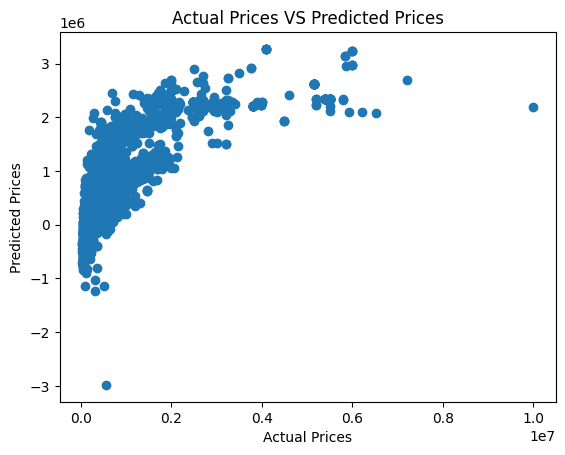

In [32]:
# Visualising actual and predicted prices
import matplotlib.pyplot as plt
plt.scatter(y_train , training_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel("Predicted Prices")
plt.title('Actual Prices VS Predicted Prices')

In [ ]:
# Checking with lasso regression


In [37]:
from sklearn.linear_model import Lasso
la = Lasso()
la.fit(x_train , y_train)

Lasso()

In [38]:
# Model Evaluation
# prediction on training data
training_data_pred_la = la.predict(x_train)

In [39]:
# r sqr error
from sklearn.metrics import r2_score
r_sqr = r2_score(y_train,training_data_pred_la)
print(f"R Sqr error : {r_sqr}")

R Sqr error : 0.5640304647376504


Text(0.5, 1.0, 'Actual Prices VS Predicted Prices')

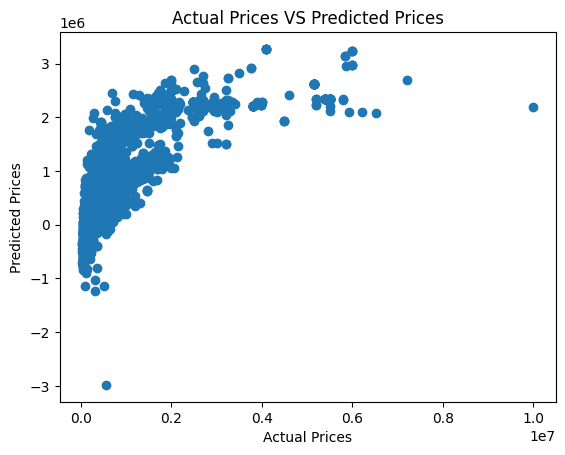

In [40]:
# Visualising actual and predicted prices
import matplotlib.pyplot as plt
plt.scatter(y_train , training_data_pred_la)
plt.xlabel('Actual Prices')
plt.ylabel("Predicted Prices")
plt.title('Actual Prices VS Predicted Prices')

### CHECKING ON TEST DATA

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_test , y_test)

LinearRegression()

In [42]:
# Model Evaluation
# prediction on training data
training_data_pred = lr.predict(x_test)

In [43]:
# r sqr error
from sklearn.metrics import r2_score
r_sqr = r2_score(y_test,training_data_pred)
print(f"R Sqr error : {r_sqr}")

R Sqr error : 0.5794402805108525


Text(0.5, 1.0, 'Actual Prices VS Predicted Prices')

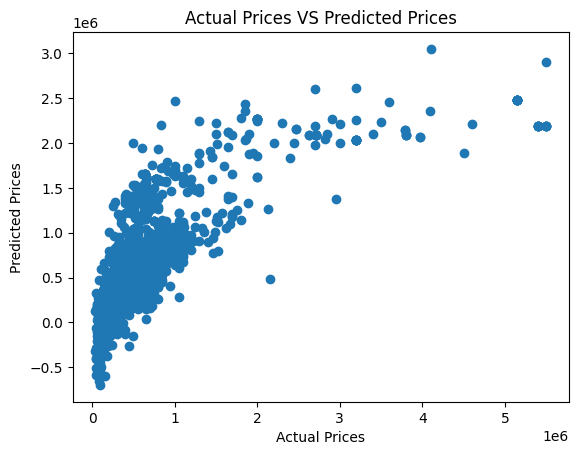

In [44]:
# Visualising actual and predicted prices
import matplotlib.pyplot as plt
plt.scatter(y_test , training_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel("Predicted Prices")
plt.title('Actual Prices VS Predicted Prices')

In [ ]:
# Checking with lasso regression


In [45]:
from sklearn.linear_model import Lasso
la = Lasso()
la.fit(x_test , y_test)

Lasso()

In [46]:
# Model Evaluation
# prediction on training data
training_data_pred_la = la.predict(x_test)

In [48]:
# r sqr error
from sklearn.metrics import r2_score
r_sqr = r2_score(y_test,training_data_pred_la)
print(f"R Sqr error : {r_sqr}")

R Sqr error : 0.5794402804692027


Text(0.5, 1.0, 'Actual Prices VS Predicted Prices')

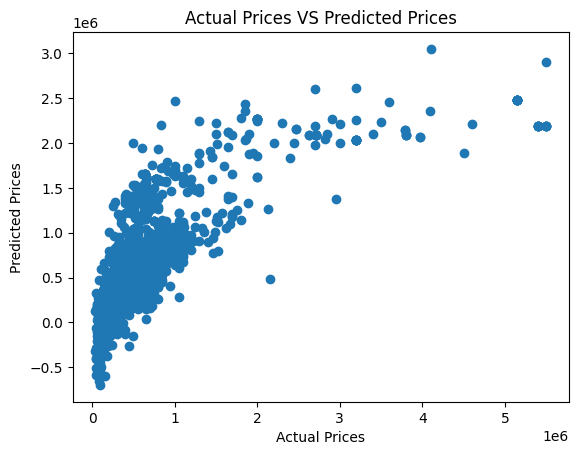

In [49]:
# Visualising actual and predicted prices
import matplotlib.pyplot as plt
plt.scatter(y_test , training_data_pred_la)
plt.xlabel('Actual Prices')
plt.ylabel("Predicted Prices")
plt.title('Actual Prices VS Predicted Prices')